<a href="https://colab.research.google.com/github/custom-hyper/Trading-Report/blob/main/2023-05-30%20%E2%80%93%20Nvidia%20%E2%80%93%20Trading_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

CoinGecko_id = "bitcoin" #@param {type:"string"}
yahoo_id = "NVDA" #@param {type:"string"}


Archive:

In [2]:
#@title
from google.colab import drive
drive.mount('/content/drive')
#@title
!pip install statistics --quiet
!pip install yfinance --quiet
!pip install pytrends --quiet
!pip install pycoingecko --quiet
!pip install pandas --quiet
!pip install Backtesting --quiet
!pip install mplfinance --quiet
!pip install configparser --quiet
!pip install psycopg2-binary==2.8.6 --quiet
!pip install tweepy==4.10.1 --quiet



Mounted at /content/drive
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.7/384.7 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.9 MB/s eta 0:00:00


In [3]:
#@title Import Project  Dependencies { display-mode: "code" }
import requests
import mplfinance as fplt
from datetime import datetime as dt
from datetime import timedelta
from datetime import date

import time
import json
import seaborn as sns
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import logging
import sys
from tqdm.notebook import tqdm
import os
import sqlite3 as sq
import psycopg2 as pg
import configparser
from sqlalchemy import create_engine
from pycoingecko import CoinGeckoAPI
import numpy as np
#from __future__ import division

Highlights

In [4]:
#@title Set up SQLite { display-mode: "code" }
#@title  Connect { display-mode: "code" }
path = '/content/drive/MyDrive/workspace/pipelines/db/' #@param {type: 'string'
database = "db.sqlite" #@param {type: 'string'
conn_SQLite = sq.connect(path+database)

# Big  Picture

<ipython-input-5-1b804749d541>:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y1" (-> marker='1'). The keyword argument will take precedence.
  plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
<ipython-input-5-1b804749d541>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y1" (-> color='y'). The keyword argument will take precedence.
  plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
<ipython-input-5-1b804749d541>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y2" (-> marker='2'). The keyword argument will take precedence.
  plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )
<ipython-input-5-1b804749d541>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the

Text(0.5, 1.0, 'Google Trends')

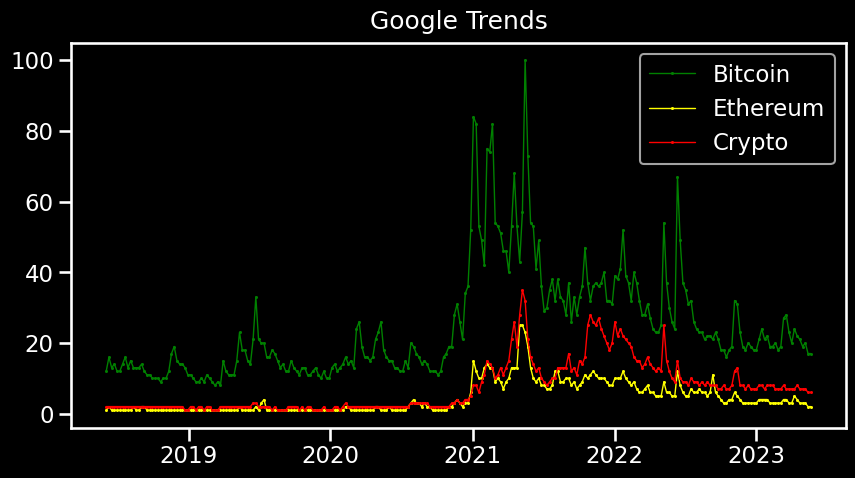

In [5]:
#@title
#@title Google Trends
import seaborn as sns
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


pytrend.build_payload(kw_list=['Bitcoin', 'Ethereum','Crypto'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Crypto', 'y3', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )

#plt.plot( 'Cosmos Crypto', 'y5', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.legend()


# title
plt.title('Google Trends', loc='center',pad=10)


In [6]:
#@title
#@title Crypto Fear & Greed Index

import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.alternative.me/fng/?limit=0")
output = response.text
json_parsed = json.loads(output)

df = pd.json_normalize(json_parsed)


df1 = pd.concat([pd.json_normalize(x) for x in df['data'].values.tolist()])
timeseries = df1['timestamp']
df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')

df_fear_greed = pd.concat([df1['date'], df1['value']], axis=1)
df3 = pd.concat([df1['date'], df1['value_classification']])

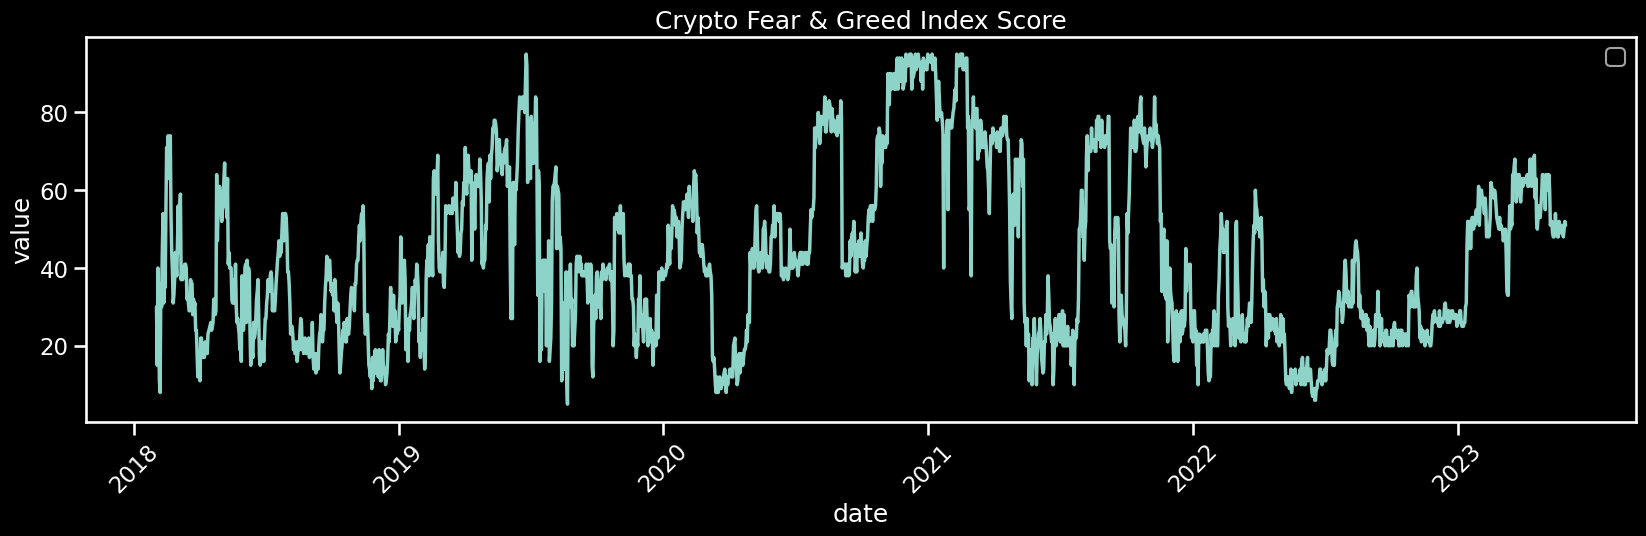

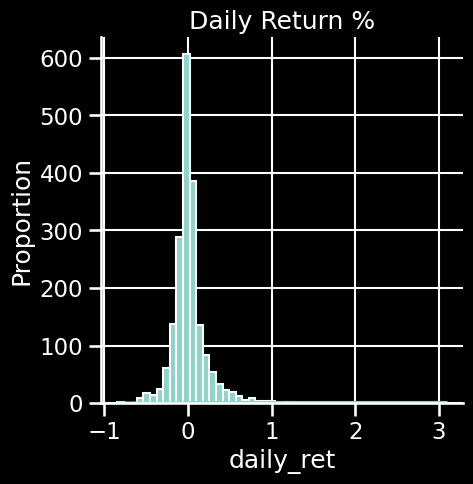

In [7]:
#@title
#@title


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("dark_background")
#sns.set_theme(style="darkgrid")

#Choose the date range
df_fear_greed = df_fear_greed[(df_fear_greed['date'] > '2016-04-01')]

df_fear_greed['value'] = df_fear_greed['value'].astype(int)
 
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(df_fear_greed=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')

plt.xticks(rotation=45)

plt.legend()


df_fear_greed.head(1)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_fear_greed['daily_ret'] = df_fear_greed['value'].pct_change(1)

ECDF = sns.displot(df_fear_greed, x="daily_ret", kind="ecdf")

Histogram = df_fear_greed['daily_ret'].hist(bins = 50)


plt.title('Daily Return %')

plt.show()

# Technical Analysis

In [8]:
#@title S&P 500
import yfinance as yf
import plotly.graph_objects as go


ticker='SPY'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['longName']


data = yf.download(tickers=ticker, period='200d')


[*********************100%***********************]  1 of 1 completed


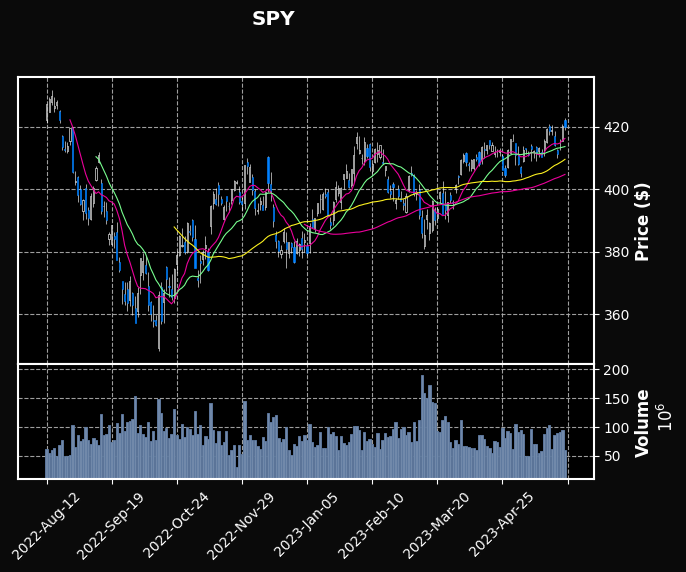

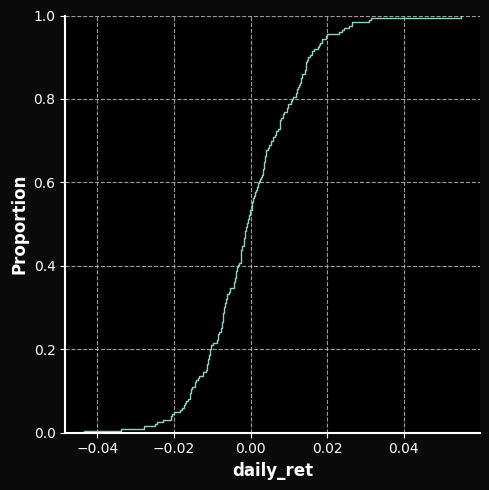

In [9]:
#@title
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")



[*********************100%***********************]  1 of 1 completed

Related News – ^VIX

– Stock Market News for May 26, 2023
– Stock Market News for May 25, 2023
– US STOCKS-Wall St ends down as debt-ceiling clouds hover
– US STOCKS-Wall St slides as debt ceiling talks drag on
– US STOCKS-Wall St slides as debt ceiling talks drag on; Fed minutes in focus
– U.S. stocks are falling as debt ceiling talks drag on
– Stock Market News for May 22, 2023


/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:694: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


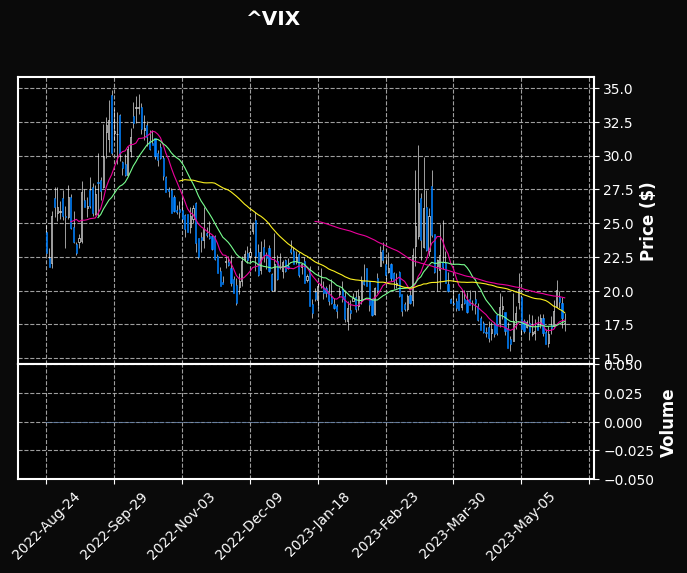

Text(0.5, 1.0, 'Daily Return %')

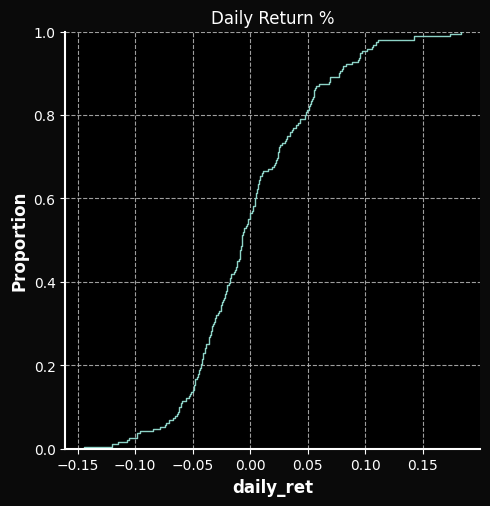

In [10]:
#@title  VIX
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='^VIX'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['Ticker']

data = yf.download(tickers=ticker, period='200d')
print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")


plt.title('Daily Return %')

/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:694: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


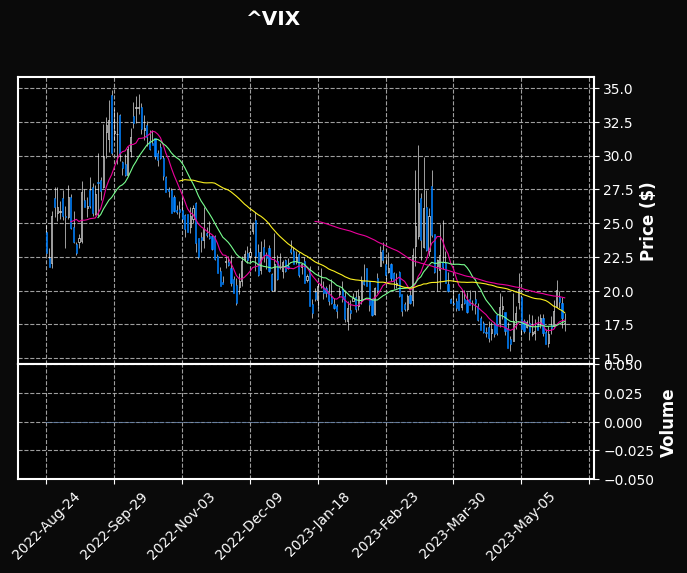

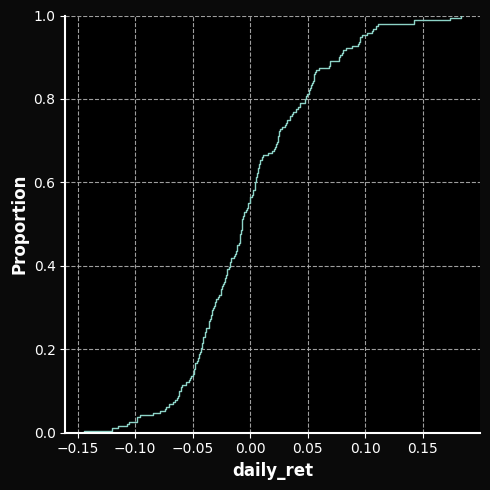

In [11]:
#@title

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )


data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")

[*********************100%***********************]  1 of 1 completed

Related News – BTC-USD



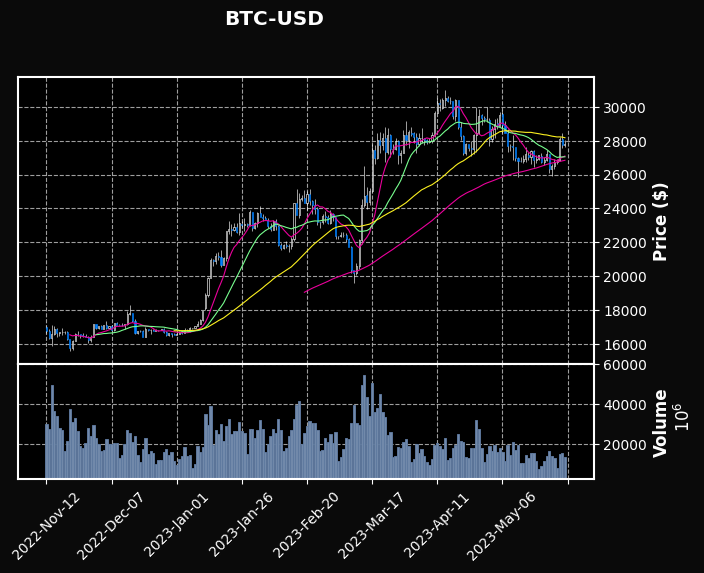

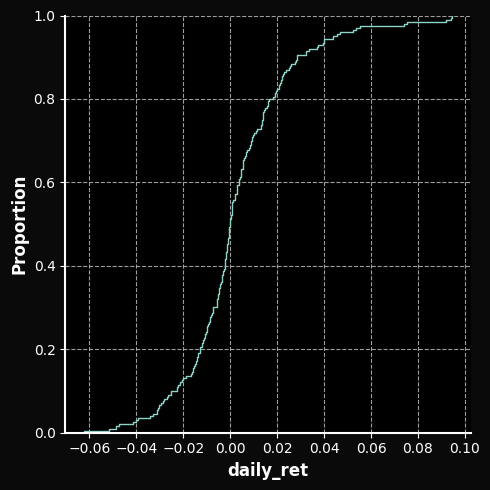

In [12]:
#@title Bitcoin
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='BTC-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='200d')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass
  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )
data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed

Related News – ETH-USD

– Cerro de Pasco Resources Reports Q1 2023 Results
– Cost of insuring against U.S. default falls further
– Phanes Therapeutics announces the appointment of Rita Laeufle, MD, PhD, as Chief Medical Officer
– Game on with the Samsung Odyssey Ark curved gaming monitor—now $1,000 off
– Twitter is testing Community Notes for images
– Second Circuit Court Upholds Purdue Pharma’s Plan of Reorganization on Appeal
– PRESS RELEASE: BIGBEN: 2022/23 FULL-YEAR RESULTS


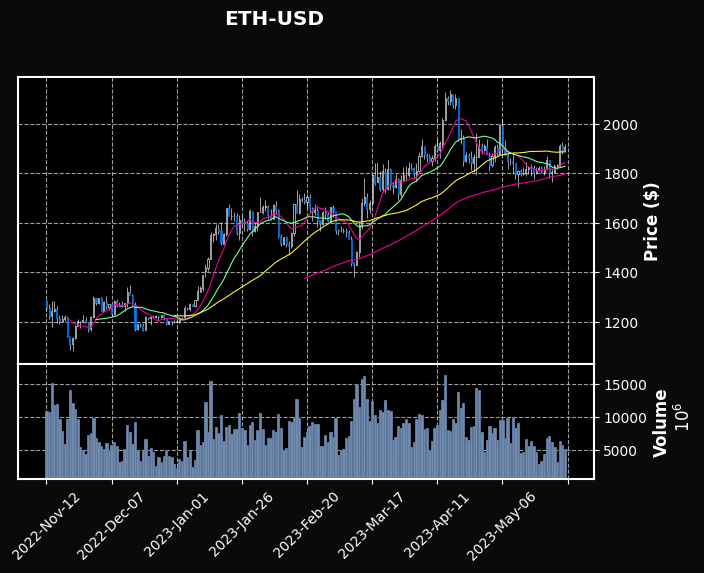

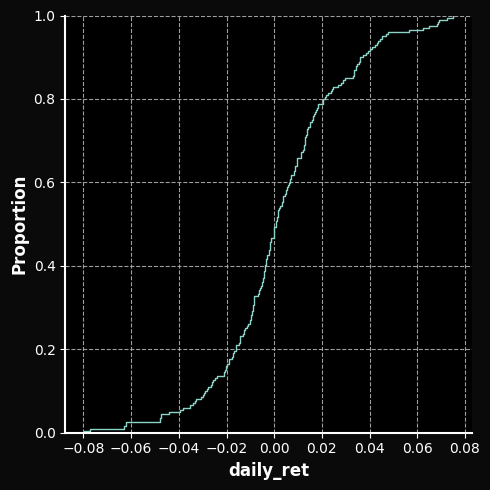

In [13]:
#@title Ethereum
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='ETH-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='200d')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title =ticker,
            ylabel='Price ($)',
            volume=True,
            mav = (10,20,50,100,200),
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DXY: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
[*********************100%***********************]  1 of 1 completed


<ipython-input-14-e64b41adb511>:30: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot=df.pivot('Date','Symbol','Close')#.reset_index()


<Figure size 640x480 with 0 Axes>

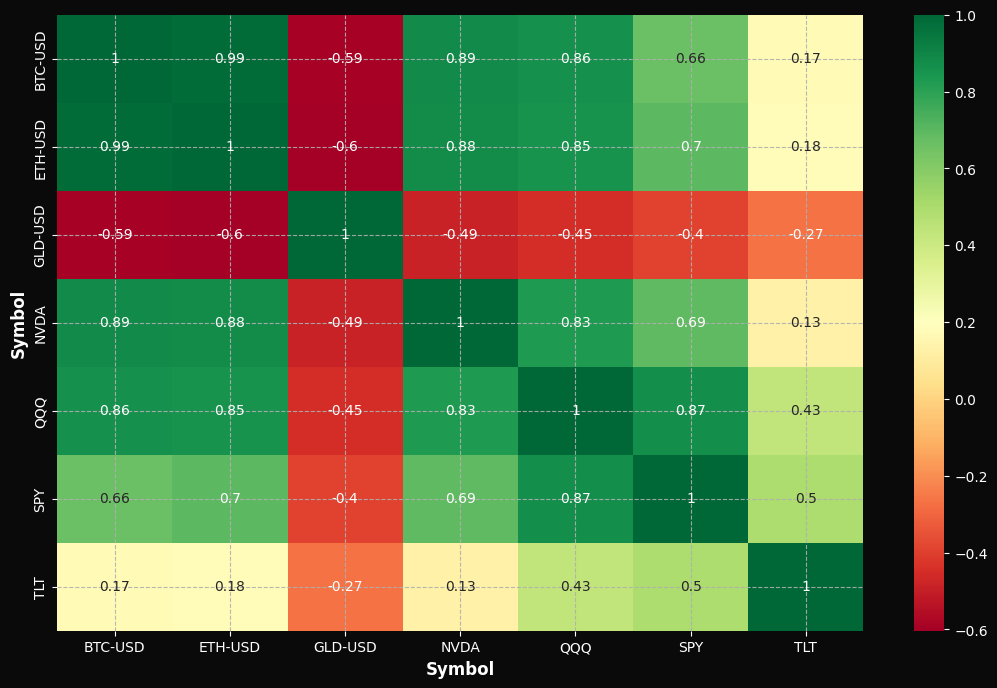

<Figure size 640x480 with 0 Axes>

In [14]:
#@title Correlation

import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

start = datetime(2022,9, 1)
symbols_list = [yahoo_id,'SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DXY', 'GLD-USD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:     
    
    r = yf.download(tickers=ticker, period='200d')
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
unknown= df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close')#.reset_index()
df_pivot.head()
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

# Crypto

Trade Management

In [15]:
#@title Fundamentals

import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

  
response = requests.get("https://api.coingecko.com/api/v3/coins/{}".format(CoinGecko_id))
output = response.text
json_parsed = json.loads(output)


x = json_parsed['market_data']['fully_diluted_valuation']

def fdv_none_val(x):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if x is None :
    fully_diluted_valuation = 0
  else :
    fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']
  
  return fully_diluted_valuation



def zero_div(x,y):
  """
  handling 0 division error
    
  """
  try:
      return x/y
  except ZeroDivisionError:
      return 0
links = 'Complete list: '+str(json_parsed['links'])
chat_url = 'Chat: '+str(json_parsed['links']['chat_url'])
CoinGecko_Link =  'CoinGecko: '+ "https://www.coingecko.com/en/coins/" + CoinGecko_id
Twitters = 'Twitter: '+str('https://twitter.com/')+str(json_parsed['links']['twitter_screen_name'])
homepage = 'Homepage: '+str(json_parsed['links']['homepage'])
subreddit_url =  'Reddit: ' +str(json_parsed['links']['subreddit_url'])
pd.set_option('display.width', 10)

print('')
print('WEB Links')
print('')
print(homepage)
print(Twitters)
print(subreddit_url)
print(chat_url)
print(CoinGecko_Link)

print(links)

print('')  
print('MARKET DATA')  
print('')  


market_cap = json_parsed['market_data']['market_cap']['usd']
circulating_supply = json_parsed['market_data']['circulating_supply']
# circulating_supply.astype(int) 
current_price = json_parsed['market_data']['current_price']['usd']
# current_price.astype(int) 
fdv_to_tvl_rati = json_parsed['market_data']['fdv_to_tvl_ratio']
# fdv_to_tvl_ratio.astype(int) 


#fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']['usd']

# fully_diluted_valuation
total_supply = json_parsed['market_data']['total_supply']
max_supply = json_parsed['market_data']['max_supply']
mcap_to_tvl_ratio = json_parsed['market_data']['mcap_to_tvl_ratio']
total_supply = json_parsed['market_data']['total_supply']
#total_value_locked = json_parsed['market_data']['total_value_locked']['usd']
total_volume = json_parsed['market_data']['total_volume']['usd']

float_rotation_24h = zero_div(total_volume , market_cap)
circulating_cap = current_price * json_parsed['market_data']['circulating_supply']
total_cap = current_price * total_supply


def max_cap(current_price, max_supply):
  """
    Calculation of maximum capitalization 
     Requiring current price and maximum supply
  """
  if max_supply is not None :
    max_cap = current_price * max_supply
  else :
    max_cap = 0
  return max_cap

max_cap = max_cap(current_price, max_supply)



def max_supply_expansion_multiple(circulating_supply, max_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if max_supply is None :
    max_supply_expansion_multiple = 0
    
  elif circulating_supply ==  0:
    max_supply_expansion_multiple == 0
  
  else :
    max_supply_expansion_multiple = max_supply  / circulating_supply
  
  return max_supply_expansion_multiple


max_supply_expansion_multiple = max_supply_expansion_multiple(circulating_supply, max_supply)

def total_supply_expansion_multiple(circulating_supply, total_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if total_supply is None :
    total_supply_expansion_multiple = 0
    
  elif circulating_supply == 0:
    total_supply_expansion_multiple == 0
  
  else :
    total_supply_expansion_multiple = total_supply  / circulating_supply
  
  return total_supply_expansion_multiple


"""
def market_cap_dilution_ratio(fully_diluted_valuation, market_cap):


  if fully_diluted_valuation or market_cap is None :
    market_cap_dilution_ratio == 0
    
  elif fully_diluted_valuation or market_cap is 0:
    market_cap_dilution_ratio == 0

  elif fully_diluted_valuation or market_cap is {}:
    market_cap_dilution_ratio == 0

  else :
    market_cap_dilution_ratio =  fully_diluted_valuation / market_cap
  
  return market_cap_dilution_ratio


market_cap_dilution_ratio = market_cap_dilution_ratio(fully_diluted_valuation, market_cap)
"""

print('')  

circulating_versus_max = circulating_supply/total_supply
dict_custom = {}
#dict_custom['total_supply_expansion_multiple'] = total_supply_expansionWhere_multiple
dict_custom['max_supply_expansion_multiple'] = max_supply_expansion_multiple
dict_custom['float_rotation_24h'] = float_rotation_24h

dict_custom['circulating_versus_max'] = circulating_versus_max


print(dict_custom)

df_market = {}
df_market['market_cap'] = market_cap
#Final been up what is on the national emergency, informative or what basket is something the P is the spaciousness up to Sarah  ankedat1['circulating_supply'] = circulating_supply
df_market['current_price'] = current_price
# df_market['fdv_to_tvl_ratio'] = fdv_to_tvl_ratio#
#df_market['fully_diluted_valuation'] = fully_diluted_valuation
# ankedat1['max_supply'] = max_supply
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_supply'] = total_supply
#df_market['total_value_locked'] = total_value_locked
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_volume'] = total_volume


print(df_market)




print('          ')  
print('PRICE ACTION')  
price_change_percentage_7d = json_parsed['market_data']['price_change_percentage_7d']
price_change_percentage_14d = json_parsed['market_data']['price_change_percentage_14d']
price_change_percentage_30d = json_parsed['market_data']['price_change_percentage_30d']
price_change_percentage_60d = json_parsed['market_data']['price_change_percentage_60d']
price_change_percentage_200d = json_parsed['market_data']['price_change_percentage_200d']
price_change_percentage_1y = json_parsed['market_data']['price_change_percentage_1y']



dict_return = {}
dict_return['price_change_percentage_7d'] = price_change_percentage_7d
dict_return['price_change_percentage_14d'] = price_change_percentage_14d
dict_return['price_change_percentage_30d'] = price_change_percentage_30d
dict_return['price_change_percentage_60d'] = price_change_percentage_60d
dict_return['price_change_percentage_200d'] = price_change_percentage_200d
dict_return['price_change_percentage_1y'] = price_change_percentage_1y

print(dict_return)



category = json_parsed['categories']

print('')  
print('CATEGORIES')  
print(category)
  



description  = [] 
pd.set_option('display.width', 10)
pd.set_option("display.max_rows", None, "display.max_columns", None)
description = json_parsed['description']['en']

print('')  
print('DESCRIPTION: ')
print(description)


links = json_parsed['links']

print('')  
print('LIQUIDITY: ')
print('')  

a = json_parsed['tickers']
data = pd.json_normalize(a,max_level=4)
df = pd.DataFrame(data)

df['pair'] = df['base'] + df['target'] 

df['market_and_volume'] = df['market.name']+ ' (' + df['volume'].round(1).astype(str)+')'
df['Exchanges'] = df.apply(lambda _: ', '.join(df['market_and_volume'] .tolist()), axis=1)
df['Exchanges'][1]

df


WEB Links

Homepage: ['http://www.bitcoin.org', '', '']
Twitter: https://twitter.com/bitcoin
Reddit: https://www.reddit.com/r/Bitcoin/
Chat: ['', '', '']
CoinGecko: https://www.coingecko.com/en/coins/bitcoin
Complete list: {'homepage': ['http://www.bitcoin.org', '', ''], 'blockchain_site': ['https://blockchair.com/bitcoin/', 'https://btc.com/', 'https://btc.tokenview.io/', 'https://www.oklink.com/btc', '', '', '', '', '', ''], 'official_forum_url': ['https://bitcointalk.org/', '', ''], 'chat_url': ['', '', ''], 'announcement_url': ['', ''], 'twitter_screen_name': 'bitcoin', 'facebook_username': 'bitcoins', 'bitcointalk_thread_identifier': None, 'telegram_channel_identifier': '', 'subreddit_url': 'https://www.reddit.com/r/Bitcoin/', 'repos_url': {'github': ['https://github.com/bitcoin/bitcoin', 'https://github.com/bitcoin/bips'], 'bitbucket': []}}

MARKET DATA


{'max_supply_expansion_multiple': 1.0831236543478027, 'float_rotation_24h': 0.025733575938164218, 'circulating_versus_max': 0

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,market.name,market.identifier,market.has_trading_incentive,converted_last.btc,converted_last.eth,converted_last.usd,converted_volume.btc,converted_volume.eth,converted_volume.usd,pair,market_and_volume,Exchanges
0,BTC,USDT,2.780054e+04,3.250046e+04,green,0.010036,2023-05-30T19:32:00+00:00,2023-05-30T19:32:00+00:00,2023-05-30T19:33:01+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether,Binance,binance,False,1.000138,14.572284,27813,32505.000000,473606.000000,9.039413e+08,BTCUSDT,Binance (32500.5),"Binance (32500.5), Coinbase Exchange (12057.9)..."
1,BTC,USD,2.782671e+04,1.205790e+04,green,0.010036,2023-05-30T19:53:01+00:00,2023-05-30T19:53:01+00:00,2023-05-30T19:53:01+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN,Coinbase Exchange,gdax,False,1.000100,14.595022,27827,12059.000000,175985.000000,3.355317e+08,BTCUSD,Coinbase Exchange (12057.9),"Binance (32500.5), Coinbase Exchange (12057.9)..."
2,BTC,USD,2.786600e+04,4.927020e+02,green,0.035881,2023-05-30T19:52:00+00:00,2023-05-30T19:52:00+00:00,2023-05-30T19:53:00+00:00,False,False,https://trading.bitfinex.com/t/BTC:USD?type=ex...,None,bitcoin,NaN,Bitfinex,bitfinex,False,1.001512,14.615630,27866,493.447000,7201.000000,1.372964e+07,BTCUSD,Bitfinex (492.7),"Binance (32500.5), Coinbase Exchange (12057.9)..."
3,BTC,USDT,2.783683e+04,6.018029e+03,green,0.010431,2023-05-30T19:50:04+00:00,2023-05-30T19:50:04+00:00,2023-05-30T19:50:04+00:00,False,False,https://www.xt.com/trade/btc_usdt,None,bitcoin,tether,XT.COM,xt,False,0.999824,14.588568,27826,6007.000000,87647.000000,1.671781e+08,BTCUSDT,XT.COM (6018.0),"Binance (32500.5), Coinbase Exchange (12057.9)..."
4,BTC,USDT,2.783001e+04,6.050161e+02,green,0.020478,2023-05-30T19:51:14+00:00,2023-05-30T19:51:14+00:00,2023-05-30T19:51:14+00:00,False,False,https://x.woo.network/spot,None,bitcoin,tether,WOO X,wootrade,False,0.999750,14.588461,27818,604.865000,8826.000000,1.683013e+07,BTCUSDT,WOO X (605.0),"Binance (32500.5), Coinbase Exchange (12057.9)..."
5,BTC,USDT,2.785531e+04,3.118203e+03,green,0.030925,2023-05-30T19:48:10+00:00,2023-05-30T19:48:10+00:00,2023-05-30T19:48:10+00:00,False,False,None,None,bitcoin,tether,Tidex,tidex,False,1.000047,14.588916,27822,3118.000000,45491.000000,8.675383e+07,BTCUSDT,Tidex (3118.2),"Binance (32500.5), Coinbase Exchange (12057.9)..."
6,WBTC,BTC,1.001300e+00,1.901781e+02,green,0.019987,2023-05-30T19:36:45+00:00,2023-05-30T19:36:45+00:00,2023-05-30T19:36:45+00:00,False,False,https://www.binance.com/en/trade/WBTC_BTC?ref=...,None,wrapped-bitcoin,bitcoin,Binance,binance,False,1.000000,14.572177,27811,190.425000,2775.000000,5.295988e+06,WBTCBTC,Binance (190.2),"Binance (32500.5), Coinbase Exchange (12057.9)..."
7,BTC,USDT,2.785420e+04,3.154424e+03,green,0.010359,2023-05-30T19:49:04+00:00,2023-05-30T19:49:04+00:00,2023-05-30T19:49:04+00:00,False,False,https://gate.io/trade/BTC_USDT,None,bitcoin,tether,Gate.io,gate,False,1.000448,14.596114,27835,3148.000000,45924.000000,8.757750e+07,BTCUSDT,Gate.io (3154.4),"Binance (32500.5), Coinbase Exchange (12057.9)..."
8,BTC,USDT,2.783769e+04,5.008639e+03,green,0.017940,2023-05-30T19:49:26+00:00,2023-05-30T19:49:26+00:00,2023-05-30T19:49:26+00:00,False,False,https://whitebit.com/trade/BTC_USDT,None,bitcoin,tether,WhiteBIT,whitebit,False,0.999855,14.587462,27818,5008.000000,73063.000000,1.393313e+08,BTCUSDT,WhiteBIT (5008.6),"Binance (32500.5), Coinbase Exchange (12057.9)..."
9,BTC,BUSD,2.785261e+04,3.928193e+02,green,0.025639,2023-05-30T19:48:10+00:00,2023-05-30T19:48:10+00:00,2023-05-30T19:48:10+00:00,False,False,None,None,bitcoin,binance-usd,Tidex,tidex,False,0.999780,14.585021,27814,392.733000,5729.000000,1.092600e+07,BTCBUSD,Tidex (392.8),"Binance (32500.5), Coinbase Exchange (12057.9)..."


In [16]:

#@title Charts

 
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

"""
1 - 2 days: 30 minutes
3 - 30 days: 4 hours
31 days and beyond: 4 days
"""
#chart  1
a = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 'max' )
df  = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])
df['datetime'] = pd.to_datetime(df['Date'], unit='ms')
fig2 = go.Figure(data=[go.Candlestick(x=df['datetime'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])                    
fig2.show()

#chart   2
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 180 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])                    
fig3.show()

#chart   3
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 30 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])                    
fig3.show()


<ipython-input-17-fb6b5b4e3882>:16: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "y1" (-> marker='1'). The keyword argument will take precedence.

<ipython-input-17-fb6b5b4e3882>:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "y1" (-> color='y'). The keyword argument will take precedence.



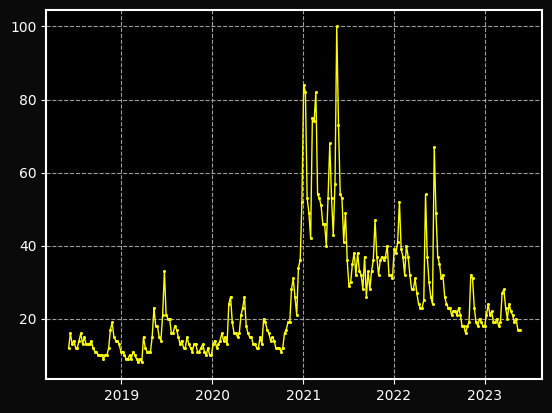

In [17]:
#@title Google Trends
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(CoinGecko_id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])


interest_over_time_df = pytrend.interest_over_time()
df_Google=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df_Google, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )

In [18]:
#@title  Project Recent Tweets
import configparser
import tweepy

config_file = "/content/drive/MyDrive/workspace/config.ini"
config_obj = configparser.ConfigParser()
config_obj.read(config_file)

Twitter = config_obj["Twitter_API"]

consumer_key = Twitter["consumer_key"]
consumer_secret = Twitter["consumer_secret"]
access_token = Twitter["access_token"]
access_token_secret = Twitter["access_token_secret"]

pd.set_option('display.width', 10)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

user_name =str(json_parsed['links']['twitter_screen_name'])

def twitter_rept(user_name):
    """
    
    Generating text data of recent tweets

    """
    
    user =  api.user_timeline(screen_name = user_name )

    for tweet in user:
      
        print(tweet.created_at)

        print(tweet.text)

        print("------------------------------------------------------------------") 
        print(Twitters)

    return 
    
twitter_rept(user_name)

Unauthorized: ignored

# Stocks

[*********************100%***********************]  1 of 1 completed


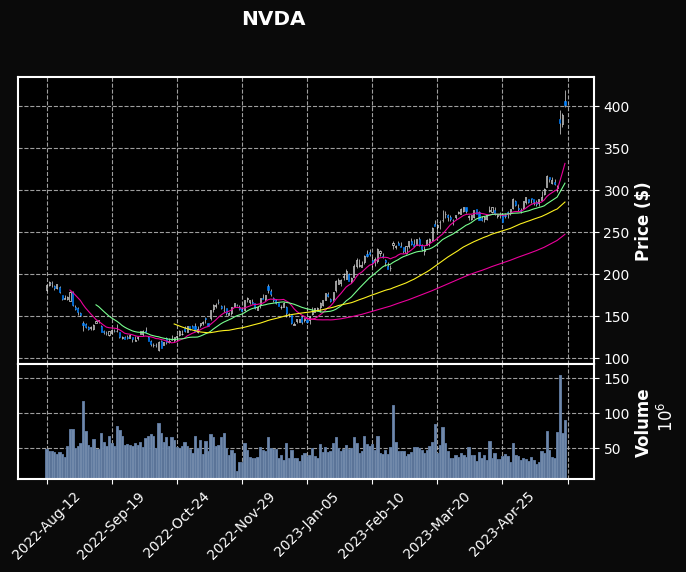

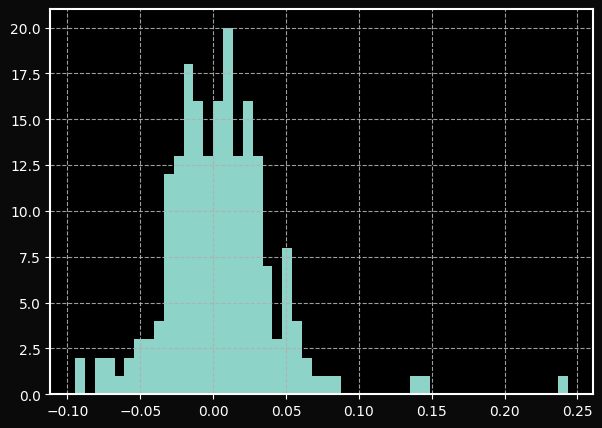

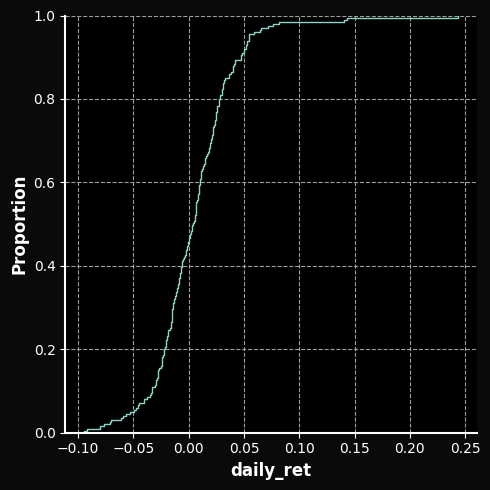

In [19]:
#@title Chart
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go


ticker=yahoo_id

data = yf.download(tickers=ticker, period='200d')
#@title
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)
data['daily_ret'].hist(bins = 50,figsize = (7,5))

sns.displot(data, x="daily_ret", kind="ecdf")

In [20]:
#@title Seasonality

#Back test

In [21]:
tickr = yf.Ticker(ticker)

In [23]:
tickr.shares

In [24]:
# get all stock info
tickr.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnec

In [25]:
# show holders
tickr.major_holders


,0,1
0,4.18%,% of Shares Held by All Insider
1,68.08%,% of Shares Held by Institutions
2,71.06%,% of Float Held by Institutions
3,4015,Number of Institutions Holding Shares


In [26]:
tickr.actions

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.00000,2.0
2001-09-10 00:00:00-04:00,0.00000,2.0
2006-04-07 00:00:00-04:00,0.00000,2.0
2007-09-11 00:00:00-04:00,0.00000,1.5
2012-11-20 00:00:00-05:00,0.01875,0.0
2013-02-26 00:00:00-05:00,0.01875,0.0
2013-05-21 00:00:00-04:00,0.01875,0.0
2013-08-20 00:00:00-04:00,0.01875,0.0
2013-11-19 00:00:00-05:00,0.02125,0.0


In [28]:
tickr.recommendations

In [29]:
tickr.calendar

In [30]:
tickr.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-05-22 06:00:00-04:00,NaN,NaN,NaN
2024-02-20 16:00:00-05:00,NaN,NaN,NaN
2023-11-14 05:00:00-05:00,NaN,NaN,NaN
2023-08-23 16:00:00-04:00,2.05,NaN,NaN
2023-05-24 12:00:00-04:00,0.92,1.09,0.1861
2023-02-22 11:00:00-05:00,0.81,0.88,0.0875
2022-11-16 11:00:00-05:00,0.69,0.58,-0.1647
2022-08-24 12:00:00-04:00,1.26,0.51,-0.5938
2022-05-25 12:00:00-04:00,1.29,1.36,0.0515


In [31]:
tickr.news

[{'uuid': 'adfdcb1c-f839-3370-9c8f-45282bb12582',
  'title': 'Nvidia Stock Hits $1 Trillion Market Cap On AI Supercomputer News',
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/adfdcb1c-f839-3370-9c8f-45282bb12582/nvidia-stock-hits-%241-trillion.html',
  'providerPublishTime': 1685477426,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/QdM.fwlWKogMh_6iA2x0Ag--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/c0a1dc6de5aa1e8e30ffa512f70df266',
     'width': 1000,
     'height': 563,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/rf9d7f8wQ6lN1Q3MncED4A--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/c0a1dc6de5aa1e8e30ffa512f70df266',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['NVDA']},
 {'uuid': '13fac2fb-a039-3218-bbdb-382cb1f1287a',
  'title': 'Nvidia Touches $1 Tril